In [1]:
import pandas as pd
import gzip
#import pandas_profiling as pdp
from IPython.display import display
import dask.dataframe as dd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.patches as mpatches

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'HGMaruGothicMPRO'
print(mpl.rcParams['font.family'])

['HGMaruGothicMPRO']


In [54]:
col_names = ["rental_id","customer_id","payment_id","inventory_id","store_id","film_id","category_id","first_name","last_name","email","address_id","activebool","create_date","active","rental_date","return_date","amount","payment_date","title","description","release_year","language_id","rental_duration","rental_rate","length","replacement_cost","rating","name","actor_id"]
df_members = pd.read_csv('OJT_DVD.csv',names=col_names )
df_members.isnull().sum()

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,10,11,13,16,20,21,22,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


rental_id              0
customer_id         4635
payment_id          4635
inventory_id           0
store_id               0
film_id             8018
category_id         8018
first_name          8035
last_name           8035
email                  0
address_id             0
activebool             0
create_date            0
active                 0
rental_date            0
return_date          616
amount              4635
payment_date        4635
title               8018
description         8018
release_year        8018
language_id         8018
rental_duration     8018
rental_rate         8018
length              8018
replacement_cost    8018
rating              8018
name                8018
actor_id            8035
dtype: int64

In [55]:
df_members['first_name'],df_members['last_name']

(0        first_name
 1               NaN
 2               NaN
 3               NaN
 4              Mary
 5           Olympia
 6              Jane
 7            Albert
 8           Russell
 9              Sean
 10             Adam
 11              Tom
 12         Humphrey
 13            River
 14            Kevin
 15         Scarlett
 16              NaN
 17              NaN
 18          Russell
 19             Gary
 20           Sandra
 21              NaN
 22          Gregory
 23              Rip
 24            Henry
 25           Audrey
 26               Ed
 27             Mary
 28         Humphrey
 29          Frances
             ...    
 52398       Matthew
 52399        Minnie
 52400          Gary
 52401         Reese
 52402       Matthew
 52403        Warren
 52404       Kirsten
 52405          Greg
 52406           NaN
 52407        Minnie
 52408         James
 52409         Woody
 52410      Michelle
 52411        Goldie
 52412           NaN
 52413           NaN
 52414      H

In [56]:
df_members=df_members.drop(0)

In [57]:
df_members['rating']=df_members['rating'].astype('category')
rating=pd.get_dummies(df_members['rating'],drop_first=True, dummy_na=True)
df_members=df_members.drop(['rating'],axis=1)
df_members=df_members.dropna(subset=['rental_duration'])
df_members=pd.concat([rating,df_members],axis=1)

In [58]:
df_members['name']

1             NaN
2             NaN
3             NaN
4        Children
5        Children
6        Children
7        Children
8        Children
9        Children
10       Children
11       Children
12         Comedy
13         Comedy
14         Comedy
15         Comedy
16            NaN
17            NaN
18        Foreign
19        Foreign
20        Foreign
21            NaN
22        Foreign
23        Foreign
24        Foreign
25        Foreign
26        Foreign
27         Travel
28         Travel
29         Travel
30         Travel
           ...   
52398    Classics
52399    Classics
52400    Classics
52401    Classics
52402    Classics
52403      Sci-Fi
52404      Sci-Fi
52405      Sci-Fi
52406         NaN
52407     Foreign
52408     Foreign
52409     Foreign
52410     Foreign
52411     Foreign
52412         NaN
52413         NaN
52414     Foreign
52415     Foreign
52416     Foreign
52417     Foreign
52418     Foreign
52419     Foreign
52420     Foreign
52421       Drama
52422     

In [59]:
df_members['rental_date']=pd.to_datetime(df_members['rental_date'],format='%Y-%m-%d')
df_members['return_date']=pd.to_datetime(df_members['return_date'],format='%Y-%m-%d')
df_members['payment_date']=pd.to_datetime(df_members['payment_date'],format='%Y-%m-%d')
df_members['create_date']=pd.to_datetime(df_members['create_date'],format='%Y-%m-%d')

df_members['customer_id']=df_members['customer_id'].astype('double')
df_members['rental_id']=df_members['rental_id'].astype('double')
df_members['payment_id']=df_members['payment_id'].astype('double')
df_members['inventory_id']=df_members['inventory_id'].astype('double')
df_members['film_id']=df_members['film_id'].astype('double')
df_members['inventory_id']=df_members['inventory_id'].astype('double')
df_members['category_id']=df_members['category_id'].astype('double')
df_members['address_id']=df_members['address_id'].astype('double')
df_members['language_id']=df_members['language_id'].astype('double')
#df_members['actor_id']=df_members['actor_id'].astype('double')

df_members['amount']=df_members['amount'].astype('double')
df_members['release_year']=df_members['release_year'].astype('double')


df_members['rental_duration']=df_members['rental_duration'].astype('double')
df_members['rental_rate']=df_members['rental_rate'].astype('double')
df_members['length']=df_members['length'].astype('double')
df_members['replacement_cost']=df_members['replacement_cost'].astype('double')


In [60]:
df_members.dtypes

NC-17                        uint8
PG                           uint8
PG-13                        uint8
R                            uint8
NaN                          uint8
rental_id                  float64
customer_id                float64
payment_id                 float64
inventory_id               float64
store_id                    object
film_id                    float64
category_id                float64
first_name                  object
last_name                   object
email                       object
address_id                 float64
activebool                  object
create_date         datetime64[ns]
active                      object
rental_date         datetime64[ns]
return_date         datetime64[ns]
amount                     float64
payment_date        datetime64[ns]
title                       object
description                 object
release_year               float64
language_id                float64
rental_duration            float64
rental_rate         

In [33]:
df_members_sum=df_members.groupby(df_members['customer_id']).sum()
df_members_sum=df_members_sum.reset_index()
df_members_sum.head()

ValueError: cannot insert customer_id, already exists

Text(0.5,1,'ユーザIDと合計値段の散布図')

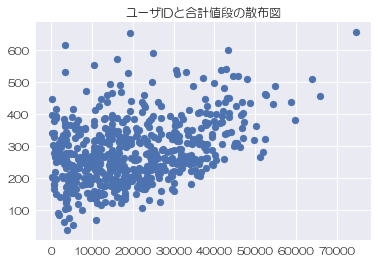

In [34]:
plt.scatter(x=df_members_sum['customer_id'],y=df_members_sum['amount'])
plt.title('ユーザIDと合計値段の散布図')

Text(0.5,1,'ユーザIDと合計値段の散布図')

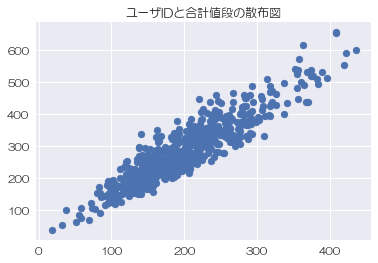

In [35]:
plt.scatter(x=df_members_sum['rental_rate'],y=df_members_sum['amount'])
plt.title('ユーザIDと合計値段の散布図')

In [12]:
customer_id_mean=df_members.groupby(df_members['customer_id']).mean()
customer_id_mean=customer_id_mean.reset_index()
customer_id_mean.head()

,customer_id,NC-17,PG,PG-13,R,nan,rental_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,1.0,0.204301,0.150538,0.258065,0.182796,0.0,8078.709677,24365.935484,2597.720430,567.225806,8.591398,5.0,3.688925,2006.0,1.0,4.795699,3.119032,123.731183,21.742688
1,2.0,0.340659,0.175824,0.120879,0.186813,0.0,8758.340659,26142.263736,2007.384615,438.505495,10.813187,6.0,4.935055,2006.0,1.0,4.670330,2.418571,132.879121,19.561429
2,3.0,0.000000,0.152941,0.247059,0.411765,0.0,8824.258824,25111.082353,1994.623529,436.905882,8.305882,7.0,4.695882,2006.0,1.0,5.270588,3.319412,116.752941,20.166471
3,4.0,0.101449,0.289855,0.159420,0.057971,0.0,7742.652174,22716.246377,1629.681159,356.231884,9.072464,8.0,2.975507,2006.0,1.0,4.768116,2.700145,124.565217,17.946522
4,5.0,0.172840,0.382716,0.197531,0.197531,0.0,9415.086420,25457.320988,1864.592593,407.962963,7.518519,9.0,3.767778,2006.0,1.0,5.148148,2.817160,122.555556,20.557901


Text(0.5,1,'ユーザIDと平均値段の散布図')

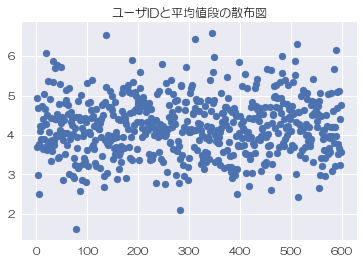

In [13]:
plt.scatter(x=customer_id_mean['customer_id'],y=customer_id_mean['amount'])
plt.title('ユーザIDと平均値段の散布図')

Text(0.5,1,'レンタル金額と一回の支払額の平均')

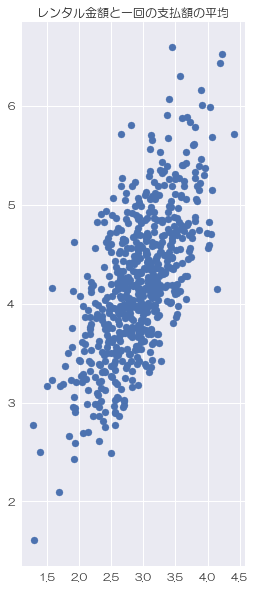

In [14]:
plt.figure(figsize=(4, 10))

plt.scatter(x=customer_id_mean['rental_rate'],y=customer_id_mean['amount'])
plt.title('レンタル金額と一回の支払額の平均')

In [15]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum.head()

,rental_date,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,2005-05-24,12.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,29268.0,6372.0,76.0,4564.0,0.0,32096.0,16.0,88.0,39.84,1632.0,407.84
1,2005-05-25,65.0,35.0,118.0,79.0,0.0,26739.0,0.0,0.0,841419.0,183919.0,2840.0,107710.0,0.0,736202.0,367.0,1828.0,1041.33,42693.0,6868.33
2,2005-05-26,147.0,29.0,97.0,113.0,0.0,111382.0,0.0,0.0,1043832.0,228450.0,4079.0,152843.0,0.0,970904.0,484.0,2373.0,1565.16,56785.0,9903.16
3,2005-05-27,131.0,97.0,117.0,87.0,0.0,203756.0,0.0,0.0,1147972.0,251075.0,4474.0,141253.0,0.0,1015036.0,506.0,2377.0,1396.94,61015.0,10313.94
4,2005-05-28,120.0,79.0,108.0,115.0,0.0,292941.0,0.0,0.0,1239037.0,270779.0,3957.0,163389.0,0.0,1007012.0,502.0,2365.0,1508.98,54513.0,10455.98


In [16]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum.head()

,rental_date,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,2005-05-24,12.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,29268.0,6372.0,76.0,4564.0,0.0,32096.0,16.0,88.0,39.84,1632.0,407.84
1,2005-05-25,65.0,35.0,118.0,79.0,0.0,26739.0,0.0,0.0,841419.0,183919.0,2840.0,107710.0,0.0,736202.0,367.0,1828.0,1041.33,42693.0,6868.33
2,2005-05-26,147.0,29.0,97.0,113.0,0.0,111382.0,0.0,0.0,1043832.0,228450.0,4079.0,152843.0,0.0,970904.0,484.0,2373.0,1565.16,56785.0,9903.16
3,2005-05-27,131.0,97.0,117.0,87.0,0.0,203756.0,0.0,0.0,1147972.0,251075.0,4474.0,141253.0,0.0,1015036.0,506.0,2377.0,1396.94,61015.0,10313.94
4,2005-05-28,120.0,79.0,108.0,115.0,0.0,292941.0,0.0,0.0,1239037.0,270779.0,3957.0,163389.0,0.0,1007012.0,502.0,2365.0,1508.98,54513.0,10455.98


In [17]:
df_members_rental_sum=df_members.groupby(df_members['rental_date'].dt.time='1d').sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum.head()

SyntaxError: keyword can't be an expression (<ipython-input-17-857ea4bcff15>, line 1)

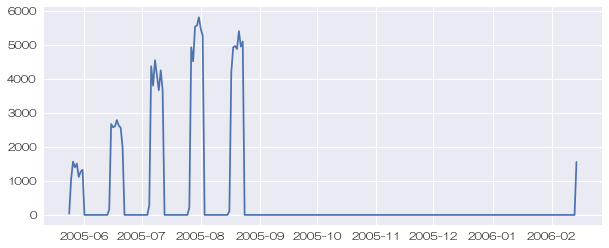

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['rental_rate'])

In [19]:
df_members_rental_count=df_members.groupby(pd.Grouper(key='rental_date',freq='1d')).count()
df_members_rental_count=df_members_rental_count.reset_index()
df_members_rental_count.head(10)

,rental_date,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,...,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,name,actor_id
0,2005-05-24,16,16,16,16,16,16,0,0,16,...,16,16,16,16,16,16,16,16,16,16
1,2005-05-25,367,367,367,367,367,367,0,0,367,...,367,367,367,367,367,367,367,367,367,366
2,2005-05-26,484,484,484,484,484,484,0,0,484,...,484,484,484,484,484,484,484,484,484,483
3,2005-05-27,506,506,506,506,506,506,0,0,506,...,506,506,506,506,506,506,506,506,506,506
4,2005-05-28,502,502,502,502,502,502,0,0,502,...,502,502,502,502,502,502,502,502,502,502
5,2005-05-29,429,429,429,429,429,429,0,0,429,...,429,429,429,429,429,429,429,429,429,429
6,2005-05-30,446,446,446,446,446,446,0,0,446,...,446,446,446,446,446,446,446,446,446,446
7,2005-05-31,422,422,422,422,422,422,0,0,422,...,422,422,422,422,422,422,422,422,422,422
8,2005-06-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2005-06-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


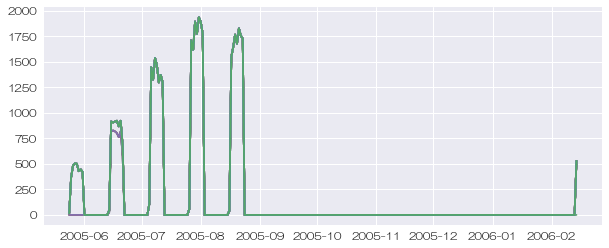

In [20]:
plt.figure(figsize=(10, 4))
A = df_members_rental_count.set_index('rental_date')
plt.plot(A)

In [21]:
df_name=df_members.groupby(pd.Grouper(key='name')).count()
df_name=df_name.reset_index()

Text(0.5,1,'ジャンル別レンタル回数')

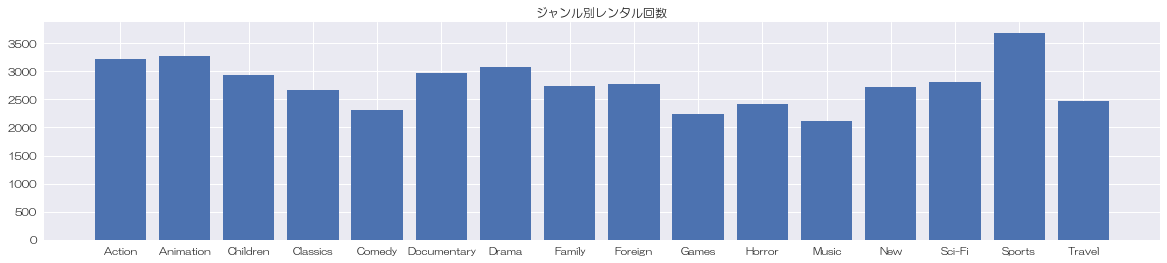

In [22]:
plt.figure(figsize=(20, 4))
plt.bar(df_name['name'],df_name['rental_rate'])
plt.title('ジャンル別レンタル回数')


In [23]:
df_name.sort_index(by='active',ascending=True)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,name,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,...,payment_date,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id
5,Music,2119,2119,2119,2119,2119,2119,1903,1903,2119,...,1903,2119,2119,2119,2119,2119,2119,2119,2119,2119
11,Games,2233,2233,2233,2233,2233,2233,2013,2013,2233,...,2013,2233,2233,2233,2233,2233,2233,2233,2233,2233
1,Comedy,2316,2316,2316,2316,2316,2316,2126,2126,2316,...,2126,2316,2316,2316,2316,2316,2316,2316,2316,2316
4,Horror,2425,2425,2425,2425,2425,2425,2208,2208,2425,...,2208,2425,2425,2425,2425,2425,2425,2425,2425,2425
3,Travel,2471,2471,2471,2471,2471,2471,2243,2243,2471,...,2243,2471,2471,2471,2471,2471,2471,2471,2471,2466
15,Classics,2667,2667,2667,2667,2667,2667,2458,2458,2667,...,2458,2667,2667,2667,2667,2667,2667,2667,2667,2667
13,New,2722,2722,2722,2722,2722,2722,2528,2528,2722,...,2528,2722,2722,2722,2722,2722,2722,2722,2722,2722
10,Family,2738,2738,2738,2738,2738,2738,2455,2455,2738,...,2455,2738,2738,2738,2738,2738,2738,2738,2738,2738
2,Foreign,2767,2767,2767,2767,2767,2767,2546,2546,2767,...,2546,2767,2767,2767,2767,2767,2767,2767,2767,2767
6,Sci-Fi,2801,2801,2801,2801,2801,2801,2612,2612,2801,...,2612,2801,2801,2801,2801,2801,2801,2801,2801,2801


In [24]:
df_name_sum=df_members.groupby(pd.Grouper(key='name')).sum()
#df_name_sum=df_name_sum.reset_index()
df_name_sum

,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
name,,,,,,,,,,,,,,,,,,,
Children,758.0,546.0,591.0,490.0,0.0,22858966.0,805312.0,67602294.0,7470045.0,1631966.0,8805.0,891891.0,10303.10,5887610.0,2935.0,14384.0,7583.65,327334.0,60396.65
Comedy,356.0,660.0,423.0,428.0,0.0,18670360.0,655066.0,52755336.0,5641236.0,1232212.0,11580.0,722268.0,10306.69,4645896.0,2316.0,10938.0,7654.84,261960.0,44932.84
Foreign,371.0,516.0,733.0,590.0,0.0,22669668.0,774977.0,62724748.0,6219570.0,1358618.0,24903.0,851330.0,10732.53,5550602.0,2767.0,13630.0,8245.33,344424.0,51919.33
Travel,406.0,837.0,456.0,470.0,0.0,19216180.0,695398.0,55234105.0,5666652.0,1238667.0,39536.0,778135.0,9466.57,4956826.0,2471.0,13866.0,8434.29,279495.0,48221.29
Horror,222.0,622.0,674.0,592.0,0.0,19761761.0,672635.0,55206831.0,5307790.0,1160451.0,26675.0,757516.0,9210.00,4864550.0,2425.0,11767.0,6928.75,284604.0,48929.75
Music,824.0,467.0,325.0,488.0,0.0,16743034.0,583751.0,47576943.0,4435686.0,969602.0,25428.0,657921.0,7989.01,4250714.0,2119.0,10924.0,6461.81,247020.0,40037.81
Sci-Fi,337.0,759.0,535.0,795.0,0.0,23239683.0,751212.0,64810603.0,6081517.0,1330071.0,39214.0,823072.0,11326.80,5618806.0,2801.0,13722.0,8716.99,303719.0,57410.99
Animation,652.0,530.0,937.0,561.0,0.0,26401618.0,864886.0,74897481.0,7664986.0,1674969.0,6532.0,951933.0,11981.07,6551596.0,3266.0,15397.0,8969.34,356488.0,63183.34
Action,397.0,415.0,660.0,742.0,0.0,24623118.0,842163.0,71501628.0,7357980.0,1610320.0,3215.0,955799.0,10844.95,6449290.0,3215.0,15722.0,8202.85,328683.0,68844.85


In [25]:
df_name_sum=df_name_sum.sort_values(by='rental_rate',ascending=False)

"\nplt.bar(df_name_sum['name'],df_name_sum['PG'])\nplt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)\nplt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])\nplt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])\nplt.title('ジャンル別レンタル回数のレイティング割合')\n"

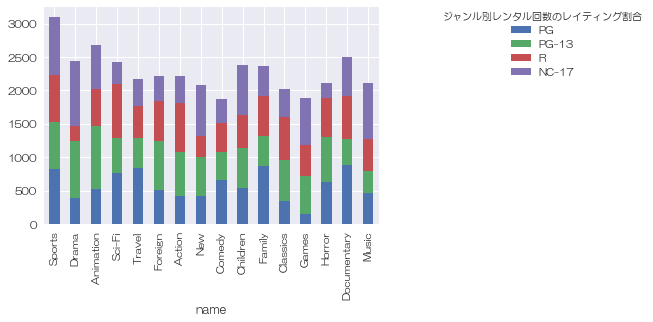

In [26]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_sum[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_積み立て.png')
'''
plt.bar(df_name_sum['name'],df_name_sum['PG'])
plt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)
plt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])
plt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])
plt.title('ジャンル別レンタル回数のレイティング割合')
'''

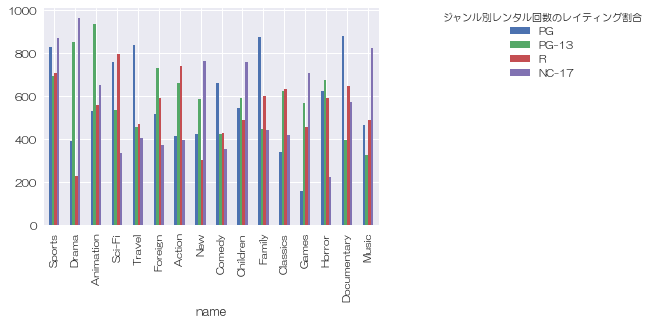

In [27]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_sum[['PG','PG-13','R','NC-17']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_比較.png')

In [28]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_name_mean[['PG','PG-13','R','NC-17']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.5, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別レンタル回数のレイティング割合')
plt.savefig('ジャンル別レンタル回数のレイティング割合_積み立て.png')
'''
plt.bar(df_name_sum['name'],df_name_sum['PG'])
plt.bar(df_name_sum['name'],df_name_sum['PG-13'],bottom=df_name_sum['PG'],stacked=)
plt.bar(df_name_sum['name'],df_name_sum['R'],bottom=df_name_sum['PG-13'])
plt.bar(df_name_sum['name'],df_name_sum['NC-17'],bottom=df_name_sum['R'])
plt.title('ジャンル別レンタル回数のレイティング割合')
'''

NameError: name 'df_name_mean' is not defined

Text(0.5,1,'ジャンル別レンタル金額合計')

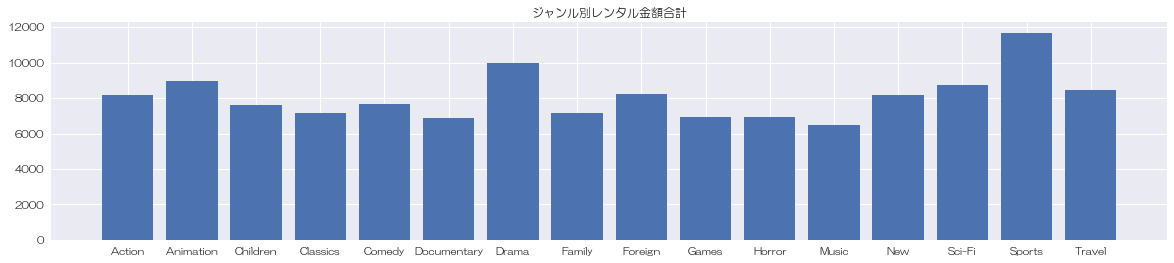

In [29]:
df_name_sum=df_name_sum.reset_index()
plt.figure(figsize=(20, 4))
plt.bar(df_name_sum['name'],df_name_sum['rental_rate'])
plt.title('ジャンル別レンタル金額合計')

In [30]:
df_name_mean=df_members.groupby(pd.Grouper(key='name')).mean()
df_name_mean=df_name_mean.reset_index()

In [31]:
df_name_mean.sort_index(by='rental_rate',ascending=True)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,name,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
14,Documentary,0.192657,0.296396,0.133378,0.217582,0.0,8063.430785,280.040212,24784.080425,2367.552375,518.044796,6.0,287.382957,3.712705,2006.0,1.0,4.610307,2.320414,109.924554,21.219707
8,Action,0.123484,0.129082,0.205288,0.230793,0.0,7658.823639,291.506750,24749.611630,2288.640747,500.877138,1.0,297.293624,3.753877,2006.0,1.0,4.890202,2.551431,102.234215,21.413639
0,Children,0.258262,0.186031,0.201363,0.166951,0.0,7788.404089,299.372491,25130.964312,2545.160136,556.036116,3.0,303.881090,3.830149,2006.0,1.0,4.900852,2.583867,111.527768,20.578075
10,Family,0.161797,0.319576,0.162893,0.219503,0.0,8124.535062,305.654175,25099.017923,2137.468955,467.994522,8.0,313.678598,3.793259,2006.0,1.0,5.234112,2.616004,112.700511,19.525062
15,Classics,0.157105,0.127484,0.233971,0.236970,0.0,8104.304837,281.815704,24307.239219,2406.486314,525.923510,4.0,287.204349,4.037152,2006.0,1.0,4.948256,2.682538,116.407199,21.577552
7,Animation,0.199633,0.162278,0.286895,0.171770,0.0,8083.777710,288.969596,25024.216839,2346.903246,512.850276,2.0,291.467544,4.003030,2006.0,1.0,4.714329,2.746277,109.151255,19.345787
4,Horror,0.091546,0.256495,0.277938,0.244124,0.0,8149.179794,304.635417,25003.093750,2188.779381,478.536495,11.0,312.377732,4.171196,2006.0,1.0,4.852371,2.857216,117.362474,20.177216
2,Foreign,0.134080,0.186484,0.264908,0.213227,0.0,8192.868811,304.390024,24636.586017,2247.766534,491.007589,9.0,307.672570,4.215448,2006.0,1.0,4.925913,2.979881,124.475605,18.763762
13,New,0.280676,0.155400,0.215283,0.111315,0.0,8403.782513,307.513449,24820.593354,2160.786554,472.844600,13.0,312.797575,4.658968,2006.0,1.0,4.386481,3.001756,109.415503,19.251205
5,Music,0.388863,0.220387,0.153374,0.230297,0.0,7901.384615,306.753022,25001.021019,2093.292119,457.575271,12.0,310.486550,4.198114,2006.0,1.0,5.155262,3.049462,116.573856,18.894672


Text(0.5,1,'ジャンル別一回のレンタル金額平均')

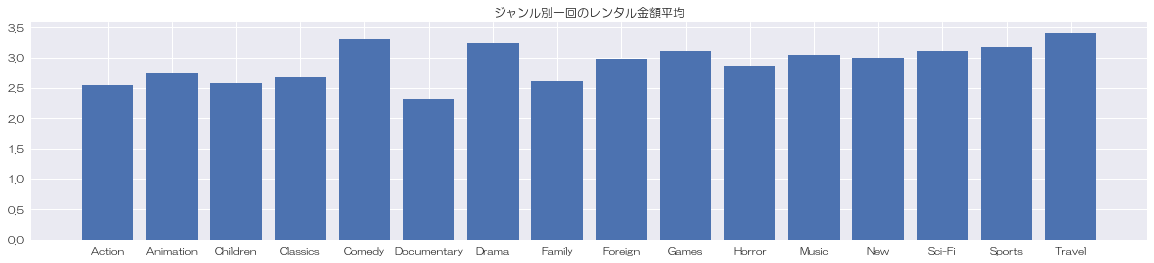

In [32]:
plt.figure(figsize=(20, 4))
plt.bar(df_name_mean['name'],df_name_mean['rental_rate'])
plt.title('ジャンル別一回のレンタル金額平均')

In [33]:
df_members_sum.corr()

,customer_id,NC-17,PG,PG-13,R,nan,rental_id,payment_id,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
customer_id,1.000000,-0.001630,0.013341,0.008164,-0.051207,NaN,-0.025336,-0.127695,-0.046600,-0.046533,0.000572,0.853436,-0.013782,-0.040339,-0.040339,-0.018602,-0.000236,-0.064380,-0.069911
NC-17,-0.001630,1.000000,-0.068428,-0.016618,-0.048568,NaN,0.307431,0.357912,0.319176,0.318936,0.366065,0.157046,0.315199,0.360500,0.360500,0.357119,0.302989,0.348151,0.349390
PG,0.013341,-0.068428,1.000000,-0.048794,0.067832,NaN,0.458243,0.470155,0.435366,0.435805,0.468643,0.241709,0.416957,0.498211,0.498211,0.488898,0.444360,0.467415,0.470628
PG-13,0.008164,-0.016618,-0.048794,1.000000,-0.078581,NaN,0.377552,0.401927,0.366095,0.366200,0.322942,0.186345,0.389323,0.407615,0.407615,0.398288,0.373812,0.384012,0.397778
R,-0.051207,-0.048568,0.067832,-0.078581,1.000000,NaN,0.397585,0.449325,0.408847,0.408911,0.397066,0.161701,0.402462,0.452485,0.452485,0.408773,0.382581,0.427514,0.436310
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rental_id,-0.025336,0.307431,0.458243,0.377552,0.397585,NaN,1.000000,0.858263,0.763666,0.764081,0.794796,0.375325,0.793481,0.895251,0.895251,0.851876,0.779344,0.858308,0.868535
payment_id,-0.127695,0.357912,0.470155,0.401927,0.449325,NaN,0.858263,1.000000,0.848316,0.848659,0.848743,0.316756,0.846749,0.970156,0.970156,0.928483,0.838540,0.922427,0.930624
inventory_id,-0.046600,0.319176,0.435366,0.366095,0.408847,NaN,0.763666,0.848316,1.000000,0.999989,0.735158,0.357329,0.780661,0.873340,0.873340,0.832450,0.773105,0.843555,0.824282
film_id,-0.046533,0.318936,0.435805,0.366200,0.408911,NaN,0.764081,0.848659,0.999989,1.000000,0.735629,0.357502,0.781052,0.873688,0.873688,0.832793,0.773392,0.843899,0.824731


In [34]:
df_film_sum=df_members.groupby(pd.Grouper(key='film_id')).sum()
df_film_sum=df_film_sum.reset_index()
df_film_sum.sort_index(by='NC-17',ascending=False)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,film_id,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
330,172.0,162,0,0,0,0,1200825.0,33525.0,4138218.0,127350.0,1134.0,37404.0,844.47,324972.0,162.0,1134.0,808.38,18144.0,2104.38
69,852.0,144,0,0,0,0,956394.0,35352.0,3359844.0,562266.0,432.0,41688.0,430.74,288864.0,144.0,576.0,142.56,14832.0,4030.56
469,606.0,143,0,0,0,0,1525316.0,39377.0,3186833.0,394849.0,2145.0,44499.0,492.70,286858.0,143.0,429.0,141.57,22880.0,2286.57
142,561.0,143,0,0,0,0,1161886.0,43362.0,2809543.0,366179.0,1859.0,50820.0,449.79,286858.0,143.0,858.0,427.57,17589.0,3859.57
0,450.0,136,0,0,0,0,941576.0,33712.0,2966736.0,282360.0,408.0,38768.0,438.80,272816.0,136.0,680.0,406.64,11424.0,4078.64
361,827.0,121,0,0,0,0,969287.0,26015.0,2734149.0,456995.0,847.0,31911.0,581.90,242726.0,121.0,605.0,603.79,17061.0,2781.79
72,849.0,120,0,0,0,0,1063248.0,29176.0,2805008.0,466120.0,240.0,32504.0,214.88,240720.0,120.0,720.0,118.80,6840.0,3478.80
331,458.0,120,0,0,0,0,1204180.0,42630.0,2588010.0,253690.0,960.0,45450.0,368.90,240720.0,120.0,480.0,118.80,16200.0,3238.80
490,307.0,119,0,0,0,0,886256.0,33334.0,2851170.0,166894.0,1904.0,33880.0,684.81,238714.0,119.0,714.0,593.81,9163.0,1188.81
202,973.0,108,0,0,0,0,651240.0,21486.0,2261958.0,481056.0,648.0,26682.0,617.10,216648.0,108.0,324.0,538.92,19764.0,3022.92


In [35]:
df_film_mean=df_members.groupby(pd.Grouper(key='film_id')).mean()
df_film_mean=df_film_mean.reset_index()
df_film_mean.sort_index(by='NC-17',ascending=False)

C:\Users\hiroyuki_ohkawa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,film_id,NC-17,PG,PG-13,R,nan,rental_id,customer_id,payment_id,inventory_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,450.0,1,0,0,0,0,6923.352941,280.933333,24722.800000,2076.176471,3.0,285.058824,3.656667,2006.0,1.0,5.0,2.99,84.0,29.99
148,334.0,1,0,0,0,0,7170.916667,375.600000,23423.500000,1528.500000,11.0,350.666667,5.390000,2006.0,1.0,6.0,4.99,65.0,21.99
750,66.0,1,0,0,0,0,8050.714286,357.285714,23058.142857,291.857143,3.0,362.285714,1.561429,2006.0,1.0,6.0,0.99,53.0,27.99
269,539.0,1,0,0,0,0,4974.000000,259.666667,24647.000000,2465.625000,7.0,267.750000,3.156667,2006.0,1.0,7.0,2.99,152.0,21.99
752,846.0,1,0,0,0,0,7995.500000,290.909091,26691.181818,3868.916667,13.0,294.166667,7.535455,2006.0,1.0,3.0,4.99,93.0,9.99
754,751.0,1,0,0,0,0,8469.500000,370.000000,20694.000000,3427.000000,13.0,375.000000,0.990000,2006.0,1.0,6.0,0.99,181.0,17.99
755,364.0,1,0,0,0,0,8988.666667,304.666667,22747.666667,1668.666667,13.0,309.333333,4.323333,2006.0,1.0,3.0,2.99,73.0,14.99
254,398.0,1,0,0,0,0,6075.500000,287.333333,22779.000000,1833.250000,12.0,237.250000,6.323333,2006.0,1.0,5.0,4.99,47.0,21.99
253,1000.0,1,0,0,0,0,7771.250000,278.714286,23315.380952,4577.583333,5.0,266.250000,7.275714,2006.0,1.0,3.0,4.99,50.0,18.99
766,436.0,1,0,0,0,0,9170.500000,383.700000,23873.900000,2002.300000,13.0,388.700000,3.290000,2006.0,1.0,4.0,0.99,122.0,14.99


# カテゴリーをダミー変数化

In [61]:
df_members['name']=df_members['name'].astype('category')
name=pd.get_dummies(df_members['name'],drop_first=True, dummy_na=True)
df_members=df_members.drop(['name'],axis=1)

df_members=pd.concat([name,df_members],axis=1)

In [37]:
df_members

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,haiyu
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,198,Mary Keitel
5,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,171,Olympia Pfeiffer
6,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,131,Jane Jackman
7,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,125,Albert Nolte
8,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,112,Russell Bacall
9,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,72,Sean Williams
10,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,71,Adam Grant


In [54]:
df_members_rental_sum=df_members.groupby(pd.Grouper(key='rental_date',freq='1m')).sum()
df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum

,rental_date,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,film_id,category_id,address_id,amount,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
0,2005-05-31,208.0,210.0,154.0,175.0,261.0,244.0,213.0,193.0,185.0,...,1607534.0,25657.0,968155.0,0.00,6363032.0,3172.0,15271.0,9260.28,367394.0,64818.28
1,2005-06-30,432.0,391.0,456.0,319.0,415.0,414.0,366.0,376.0,308.0,...,3175557.0,51164.0,1810910.0,22943.36,12411122.0,6187.0,30755.0,17957.13,718107.0,122872.13
2,2005-07-31,1403.0,1383.0,1017.0,1008.0,1178.0,1413.0,1152.0,1115.0,926.0,...,9502652.0,156958.0,5763601.0,79265.44,37825136.0,18856.0,92533.0,55213.44,2179320.0,380393.44
3,2005-08-31,1160.0,926.0,1026.0,789.0,1100.0,992.0,971.0,1050.0,787.0,...,7959106.0,132776.0,4758587.0,66006.35,31423990.0,15665.0,76721.0,45222.35,1809685.0,319120.35
4,2005-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
5,2005-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
6,2005-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
7,2005-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
8,2006-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
9,2006-02-28,63.0,25.0,14.0,25.0,15.0,17.0,36.0,33.0,27.0,...,277297.0,4270.0,147612.0,1553.67,1061174.0,529.0,2482.0,1555.71,60490.0,9982.71


In [99]:
df_members.columns

Index([       'Animation',         'Children',         'Classics',
                 'Comedy',      'Documentary',            'Drama',
                 'Family',          'Foreign',            'Games',
                 'Horror',            'Music',              'New',
                 'Sci-Fi',           'Sports',           'Travel',
                      nan,            'NC-17',               'PG',
                  'PG-13',                'R',                nan,
              'rental_id',      'customer_id',       'payment_id',
           'inventory_id',         'store_id',          'film_id',
            'category_id',       'first_name',        'last_name',
                  'email',       'address_id',       'activebool',
            'create_date',           'active',      'rental_date',
            'return_date',           'amount',     'payment_date',
                  'title',      'description',     'release_year',
            'language_id',  'rental_duration',      'rental_ra

# ジャンル別レンタル回数折れ線グラフ

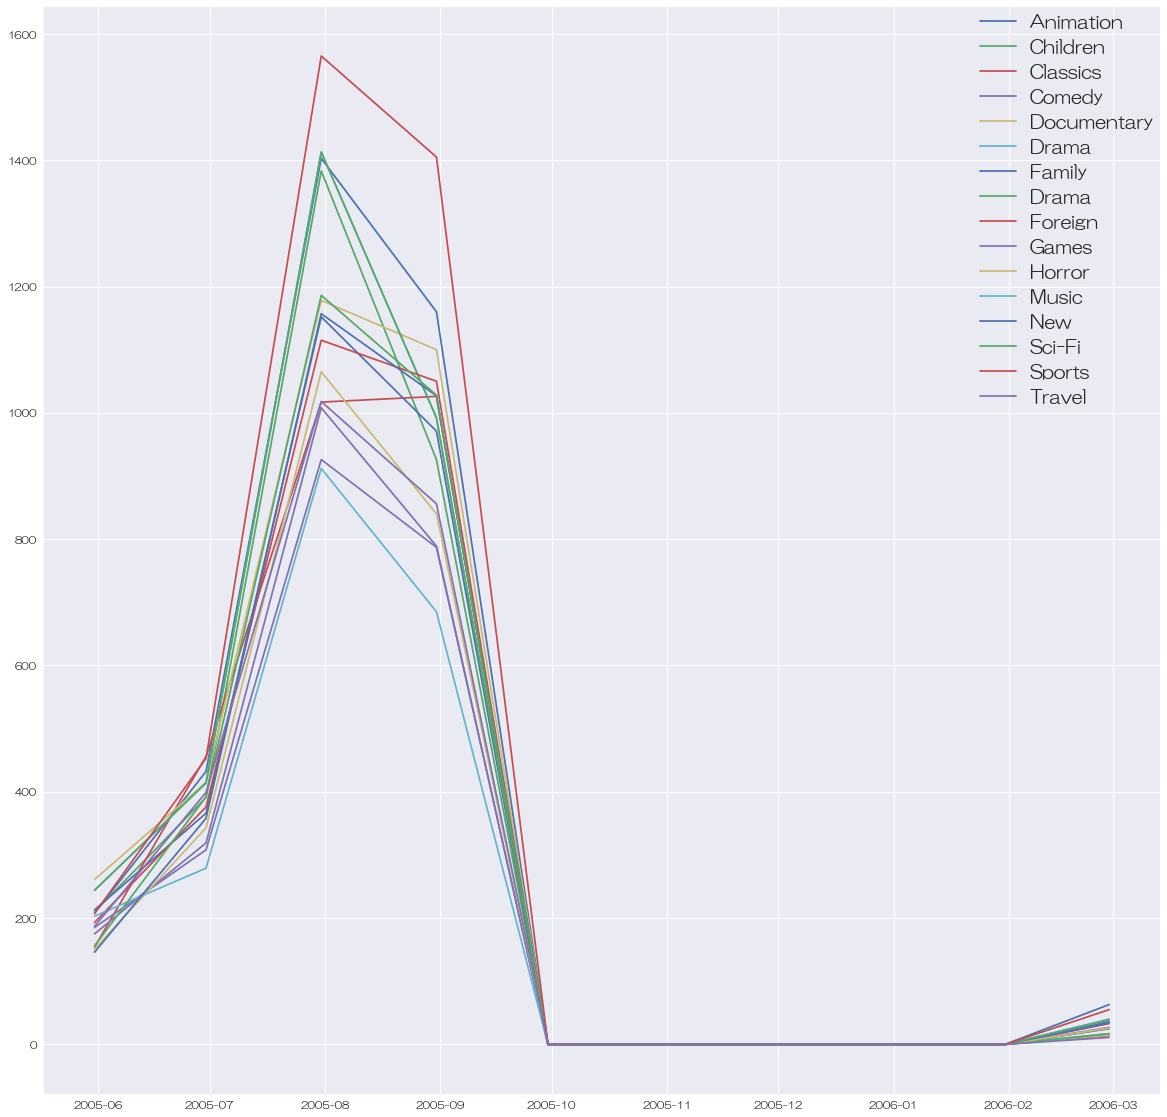

In [57]:
plt.figure(figsize=(20, 20))
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Animation'],label='Animation')
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Children'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Classics'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Comedy'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Documentary'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Drama'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Family'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Drama'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Foreign'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Games'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Horror'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Music'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['New'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Sci-Fi'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Sports'])
plt.plot(df_members_rental_sum['rental_date'],df_members_rental_sum['Travel'])

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)

# ユーザIDごとに集計したDFバージョン2

In [66]:
df_members_sum = df_members.groupby(df_members['customer_id']).sum()
df_members_sum = df_members_sum.drop(labels=['customer_id','film_id','category_id','address_id','release_year','language_id','rental_id','payment_id','inventory_id','amount'],axis=1)
df_members_sum=df_members_sum.reset_index()
df_members_sum

,customer_id,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,...,nan,NC-17,PG,PG-13,R,nan,rental_duration,rental_rate,length,replacement_cost
0,1.0,2,0,11,12,0,12,0,5,0,...,0,19,14,24,17,0,446.0,290.07,11507.0,2022.07
1,2.0,8,5,13,0,2,0,0,0,6,...,0,31,16,11,17,0,425.0,220.09,12092.0,1780.09
2,3.0,13,0,8,10,3,4,3,0,6,...,0,0,13,21,35,0,448.0,282.15,9924.0,1714.15
3,4.0,7,4,0,6,0,0,0,14,0,...,0,7,20,11,4,0,329.0,186.31,8595.0,1238.31
4,5.0,7,0,19,6,0,6,7,7,7,...,0,14,31,16,16,0,417.0,228.19,9927.0,1665.19
5,6.0,8,16,0,0,0,11,0,7,14,...,0,22,13,16,24,0,405.0,112.19,8426.0,1844.19
6,7.0,11,0,0,4,5,0,9,0,0,...,0,10,24,24,21,0,425.0,263.10,10363.0,1673.10
7,8.0,6,0,11,0,10,10,0,6,0,...,0,19,21,16,6,0,415.0,233.20,11438.0,1455.20
8,9.0,0,0,13,0,0,0,0,7,0,...,0,3,15,14,22,0,414.0,253.28,8889.0,1474.28
9,10.0,0,0,0,4,17,9,0,6,9,...,0,11,14,7,26,0,371.0,185.28,7098.0,1543.28


In [67]:
df_members

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,haiyu
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,198,Mary Keitel
5,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,171,Olympia Pfeiffer
6,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,131,Jane Jackman
7,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,125,Albert Nolte
8,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,112,Russell Bacall
9,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,72,Sean Williams
10,0,1,0,0,0,0,0,0,0,0,...,Idols Snatchers,A Insightful Drama of a Car And a Composer who...,2006.0,1.0,5.0,2.99,84.0,29.99,71,Adam Grant


# レンタル期間別に集計したDF

In [96]:
df_members_rental_duration_sum = df_members.groupby(pd.Grouper(key='rental_duration')).sum()
df_members_rental_duration_sum = df_members_rental_duration_sum.drop(labels=['customer_id','film_id','category_id','address_id','release_year','language_id','rental_id','payment_id','inventory_id','amount'],axis=1)
#df_members_rental_duration_sum=df_members_rental_duration_sum.reset_index()
df_members_rental_duration_sum = df_members_rental_duration_sum.sort_index()
df_members_rental_duration_sum

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,Travel,nan,NC-17,PG,PG-13,R,nan,rental_rate,length,replacement_cost
rental_duration,,,,,,,,,,,,,,,,,,,,,
3.0,829.0,573.0,596.0,556.0,809.0,435.0,456.0,612.0,350.0,238.0,...,385.0,0.0,1571.0,1790.0,1607.0,2032.0,0.0,25185.63,1059452.0,187794.63
4.0,835.0,563.0,496.0,619.0,676.0,625.0,398.0,586.0,489.0,1052.0,...,300.0,0.0,1511.0,2169.0,2302.0,2323.0,0.0,26901.36,1051849.0,194087.36
5.0,476.0,790.0,563.0,396.0,590.0,925.0,491.0,498.0,307.0,353.0,...,263.0,0.0,2075.0,1501.0,1709.0,1953.0,0.0,27690.88,1045481.0,179220.88
6.0,692.0,600.0,474.0,401.0,651.0,511.0,835.0,537.0,752.0,394.0,...,465.0,0.0,2541.0,1945.0,2328.0,1194.0,0.0,27201.63,1127354.0,191983.63
7.0,434.0,409.0,538.0,344.0,243.0,584.0,558.0,534.0,335.0,388.0,...,1058.0,0.0,1365.0,1840.0,1555.0,1228.0,0.0,22229.41,850860.0,144100.41


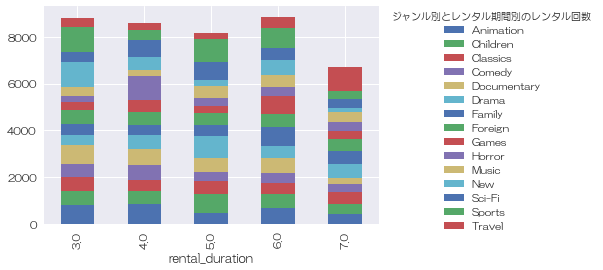

In [119]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_rental_duration_sum[['Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']]
dfg.plot.bar(stacked=True)
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別とレンタル期間別のレンタル回数')
plt.savefig('ジャンル別とレンタル期間別のレンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

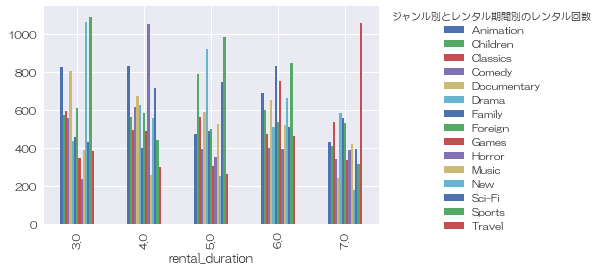

In [118]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_rental_duration_sum[['Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 0.9, 0.3, .100), 
           borderaxespad=0,
          title='ジャンル別とレンタル期間別のレンタル回数')
plt.savefig('ジャンル別とレンタル期間別のレンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

In [110]:
df_film_sum

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,inventory_id,film_id,category_id,address_id,amount,release_year,language_id,rental_rate,length,replacement_cost
rental_duration,,,,,,,,,,,,,,,,,,,,,
3.0,0.088787,0.061369,0.063832,0.059548,0.086645,0.046589,0.048838,0.065546,0.037485,0.025490,...,2543.674092,555.757631,8.500803,298.508086,5.108580,2006.0,1.0,2.697401,113.468138,20.112952
4.0,0.088229,0.059489,0.052409,0.065406,0.071429,0.066040,0.042054,0.061919,0.051669,0.111158,...,2366.049873,517.498204,7.867815,304.982777,4.495220,2006.0,1.0,2.842494,111.142117,20.507963
5.0,0.053411,0.088645,0.063173,0.044434,0.066203,0.103793,0.055094,0.055880,0.034448,0.039610,...,2281.504713,498.794098,8.167976,294.500337,4.226362,2006.0,1.0,3.107145,117.311602,20.110063
6.0,0.072560,0.062913,0.049701,0.042047,0.068260,0.053581,0.087554,0.056307,0.078851,0.041313,...,2111.873755,461.918842,8.476355,305.863584,3.535492,2006.0,1.0,2.852221,118.208451,20.130401
7.0,0.060623,0.057131,0.075150,0.048051,0.033943,0.081576,0.077944,0.074591,0.046794,0.054198,...,2289.394748,500.748848,8.850398,312.017041,3.435913,2006.0,1.0,3.105100,118.851795,20.128567


# ユーザごとに何回借りているかを見る

In [142]:
df_members_rental_sum=df_members.groupby(['customer_id','actor_id']).sum()
#df_members_rental_sum=df_members_rental_sum.reset_index()
df_members_rental_sum

Animation  Children  Classics  Comedy  Documentary  \
customer_id actor_id                                                       
1.0         4.0               0         0         0       0            0   
            6.0               1         0         0       0            0   
            15.0              0         0         0       0            0   
            19.0              0         0         0       0            0   
            20.0              0         0         1       0            0   
            37.0              0         0         1       1            0   
            44.0              0         0         0       0            0   
            47.0              0         0         0       0            0   
            49.0              0         0         0       0            0   
            50.0              0         0         0       0            0   
            51.0              0         0         0       0            0   
            53.0              0         0         0       0            0   
            57.0              0         0         0       1            0   
            71.0              0         0         0       1            0   
            74.0              0         0         1       0            0   
            75.0              0         0         0       0            0   
            81.0              0         0         0       0            0   
            84.0              0         0         0       1            0   
            90.0              0         0         1       0            0   
            99.0              0         0         0       0            0   
            104.0             1         0         0       0            0   
            126.0             0         0         0       1            0   
            160.0             0         0         0       0            0   
            161.0             0         0         0       0            0   
            179.0             0         0         0       0            0   
            181.0             0         0         0       0            0   
            186.0             0         0         0       0            0   
            198.0             0         0         0       0            0   
            10                0         0         1       0            0   
            106               0         0         0       0            0   
...                         ...       ...       ...     ...          ...   
599.0       119               0         0         0       0            0   
            125               0         0         0       0            0   
            127               0         0         0       1            0   
            130               0         0         0       0            0   
            136               0         0         0       0            0   
            145               0         0         0       0            0   
            151               0         0         0       0            0   
            158               0         0         0       0            0   
            159               0         0         0       0            0   
            165               0         0         0       0            0   
            171               0         0         0       0            0   
            172               0         0         0       0            0   
            173               0         0         0       0            0   
            181               0         0         0       0            0   
            182               0         0         0       0            0   
            183               0         0         0       1            0   
            185               0         0         0       0            0   
            20                0         0         0       0            0   
            200               0         0         0       0            0   
            41                0         0         0       0           

In [138]:
df_members2 = df_members.set_index(['customer_id','rental_id','film_id'], drop=True)


In [139]:
df_members2

Animation  Children  Classics  Comedy  \
customer_id rental_id film_id                                          
NaN         NaN       NaN              0         0         0       0   
                      NaN              0         0         0       0   
                      NaN              0         0         0       0   
            5.0       450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
                      450.0            0         1         0       0   
            6.0       613.0            0         0         0       1   
                      613.0            0         0         0       1   
                      613.0            0         0         0       1   
                      613.0            0         0         0       1   
            NaN       NaN              0         0         0       0   
                      NaN              0         0         0       0   
            9.0       565.0            0         0         0       0   
                      565.0            0         0         0       0   
                      565.0            0         0         0       0   
            NaN       NaN              0         0         0       0   
            11.0      971.0            0         0         0       0   
                      971.0            0         0         0       0   
                      971.0            0         0         0       0   
                      971.0            0         0         0       0   
                      971.0            0         0         0       0   
            12.0      347.0            0         0         0       0   
                      347.0            0         0         0       0   
                      347.0            0         0         0       0   
                      347.0            0         0         0       0   
...                                  ...       ...       ...     ...   
121.0       16041.0   895.0            0         0         1       0   
                      895.0            0         0         1       0   
                      895.0            0         0         1       0   
                      895.0            0         0         1       0   
                      895.0            0         0         1       0   
131.0       16042.0   137.0            0         0         0       0   
                      137.0            0         0         0       0   
                      137.0            0         0         0       0   
NaN         NaN       NaN              0         0         0       0   
468.0       16044.0   290.0            0         0         0       0   
                      290.0            0         0         0       0   
                      290.0            0         0         0       0   
                      290.0            0         0         0       0   
                      290.0            0         0         0       0   
NaN         NaN       NaN              0         0         0       0   
                      NaN              0         0         0       0   
114.0       16047.0   452.0            0         0         0       0   
                      452.0            0         0         0       0   
                      452.0            0         0         0       0   
                      452.0            0         0         0       0   
                      452.0            0         0         0       0   
                      452.0            0         0         0       0   
                      452.0            0         0         0       0   

In [72]:
df_members['rental_duration'].value_counts()

6.0    9537
4.0    9464
3.0    9337
5.0    8912
7.0    7159
Name: rental_duration, dtype: int64

In [70]:
df_members['rental_duration'].mean(),df_members['rental_duration'].median(),df_members['rental_duration'].min(),df_members['rental_duration'].max()

(4.903555585579499, 5.0, 3.0, 7.0)

In [67]:
(df_members['return_date'] - df_members['rental_date']).mean(),(df_members['return_date'] - df_members['rental_date']).median(),(df_members['return_date'] - df_members['rental_date']).max(),(df_members['return_date'] - df_members['rental_date']).min()

(Timedelta('5 days 01:06:16.227894'),
 Timedelta('5 days 01:08:00'),
 Timedelta('9 days 05:59:00'),
 Timedelta('0 days 18:00:00'))

In [249]:
df_members['nissu']=df_members['nissu'] / np.timedelta64(1, 'D')#.astype(int)


In [253]:
df_members['nissu'],df_members['rental_duration']

(1             NaN
 2             NaN
 3             NaN
 4        8.227778
 5        8.227778
 6        8.227778
 7        8.227778
 8        8.227778
 9        8.227778
 10       8.227778
 11       8.227778
 12       2.100000
 13       2.100000
 14       2.100000
 15       2.100000
 16            NaN
 17            NaN
 18       3.015278
 19       3.015278
 20       3.015278
 21            NaN
 22       8.865972
 23       8.865972
 24       8.865972
 25       8.865972
 26       8.865972
 27       5.225694
 28       5.225694
 29       5.225694
 30       5.225694
            ...   
 52398    1.912500
 52399    1.912500
 52400    1.912500
 52401    1.912500
 52402    1.912500
 52403    0.815278
 52404    0.815278
 52405    0.815278
 52406         NaN
 52407    1.238889
 52408    1.238889
 52409    1.238889
 52410    1.238889
 52411    1.238889
 52412         NaN
 52413         NaN
 52414    1.170833
 52415    1.170833
 52416    1.170833
 52417    1.170833
 52418    1.170833
 52419    1.

In [255]:
df_members['rental_rate'],df_members['amount']

(1         NaN
 2         NaN
 3         NaN
 4        2.99
 5        2.99
 6        2.99
 7        2.99
 8        2.99
 9        2.99
 10       2.99
 11       2.99
 12       0.99
 13       0.99
 14       0.99
 15       0.99
 16        NaN
 17        NaN
 18       4.99
 19       4.99
 20       4.99
 21        NaN
 22       4.99
 23       4.99
 24       4.99
 25       4.99
 26       4.99
 27       4.99
 28       4.99
 29       4.99
 30       4.99
          ... 
 52398    2.99
 52399    2.99
 52400    2.99
 52401    2.99
 52402    2.99
 52403    2.99
 52404    2.99
 52405    2.99
 52406     NaN
 52407    0.99
 52408    0.99
 52409    0.99
 52410    0.99
 52411    0.99
 52412     NaN
 52413     NaN
 52414    0.99
 52415    0.99
 52416    0.99
 52417    0.99
 52418    0.99
 52419    0.99
 52420    0.99
 52421    4.99
 52422    4.99
 52423     NaN
 52424    2.99
 52425    2.99
 52426    2.99
 52427    2.99
 Name: rental_rate, Length: 52427, dtype: float64, 1         NaN
 2         NaN
 3   

In [62]:
df_members['haiyu'] = df_members['first_name'] + ' ' + df_members['last_name']

In [63]:
df_members.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [64]:
df_members_haiyu=df_members.groupby(['haiyu','film_id']).sum()
df_members_haiyu.drop(['inventory_id', 'category_id','address_id','rental_id','customer_id','payment_id','amount','release_year','language_id'], axis=1, inplace=True)

In [68]:
df_members_haiyu=df_members.groupby(['haiyu']).sum()
df_members_haiyu.drop(['inventory_id', 'category_id','address_id','rental_id','customer_id','payment_id','amount','release_year','language_id'], axis=1, inplace=True)

In [75]:
df_members_haiyu['goukei']=df_members_haiyu[ 'NC-17']+df_members_haiyu['PG']+df_members_haiyu['PG-13']+df_members_haiyu['R']
df_members_haiyu=df_members_haiyu.sort_values(by='goukei',ascending=False)

In [83]:
df_members_haiyu_top=df_members_haiyu.head(5)

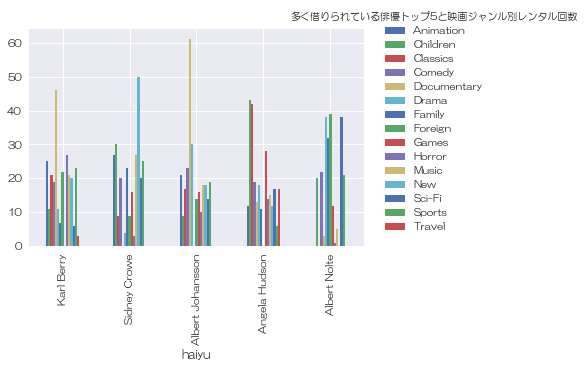

In [93]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_haiyu_top[['Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 1, 0.3, .100), 
           borderaxespad=0,
          title='多く借りられている俳優トップ5と映画ジャンル別レンタル回数')
plt.savefig('多く借りられている俳優トップ5と映画ジャンル別レンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

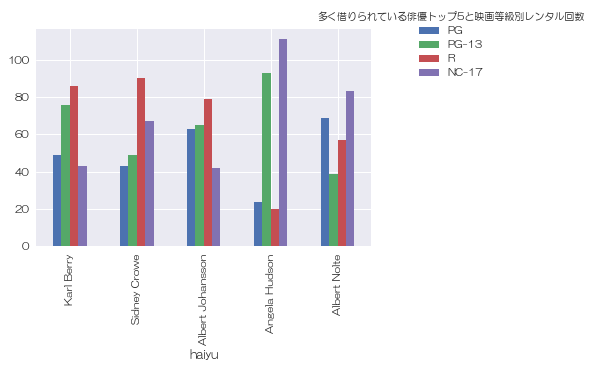

In [94]:
dfg=plt.figure(figsize=(20, 4))
dfg=df_members_haiyu_top[['PG','PG-13','R','NC-17']]
dfg.plot.bar()
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 1, 0.3, .100), 
           borderaxespad=0,
          title='多く借りられている俳優トップ5と映画等級別レンタル回数')
plt.savefig('ジャンル別とレンタル期間別のレンタル回数.png')
#たぶん3日は新作とスポーツ系が多くて、4日はホラー系、5日はスポーツ系と子供系とドラマ系、6日はスポーツ系と家族系とゲーム系、7日はトラベル系が多い

In [96]:
df_members_haiyu_top

,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,...,PG,PG-13,R,nan,film_id,rental_duration,rental_rate,length,replacement_cost,goukei
haiyu,,,,,,,,,,,,,,,,,,,,,
Karl Berry,25,11,21,19,46,11,7,22,0,27,...,49,76,86,0,132101.0,1430.0,689.22,32396.0,5660.22,254
Sidney Crowe,27,30,9,20,0,4,23,9,16,3,...,43,49,90,0,160161.0,1530.0,831.02,35794.0,5438.02,249
Albert Johansson,21,9,17,23,61,30,0,14,16,10,...,63,65,79,0,138729.0,1356.0,813.30,34278.0,6012.30,249
Angela Hudson,12,43,42,19,13,18,11,0,28,14,...,24,93,20,0,147433.0,1548.0,871.18,29734.0,5981.18,248
Albert Nolte,0,20,0,22,3,38,32,39,12,1,...,69,39,57,0,119759.0,1208.0,716.41,28126.0,5757.41,248


In [101]:
test=(['customer_id','haiyu']).count()

In [102]:
test

Animation  Children  Classics  Comedy  \
customer_id haiyu                                                         
1.0         Adam Grant                    1         1         1       1   
            Anne Cronyn                   1         1         1       1   
            Audrey Olivier                1         1         1       1   
            Ben Harris                    1         1         1       1   
            Ben Willis                    1         1         1       1   
            Bette Nicholson               1         1         1       1   
            Bob Fawcett                   1         1         1       1   
            Burt Posey                    2         2         2       2   
            Burt Temple                   1         1         1       1   
            Cary Mcconaughey              1         1         1       1   
            Chris Depp                    1         1         1       1   
            Christian Gable               2         2         2       2   
            Christian Neeson              1         1         1       1   
            Christopher Berry             2         2         2       2   
            Cuba Olivier                  1         1         1       1   
            Dan Torn                      1         1         1       1   
            Daryl Wahlberg                2         2         2       2   
            Ed Chase                      2         2         2       2   
            Ed Guiness                    2         2         2       2   
            Ellen Presley                 1         1         1       1   
            Elvis Marx                    1         1         1       1   
            Frances Tomei                 1         1         1       1   
            Gary Phoenix                  1         1         1       1   
            Gene Mckellen                 1         1         1       1   
            Geoffrey Heston               1         1         1       1   
            Grace Mostel                  1         1         1       1   
            Greg Chaplin                  1         1         1       1   
            Greta Keitel                  1         1         1       1   
            Greta Malden                  1         1         1       1   
            Groucho Dunst                 1         1         1       1   
...                                     ...       ...       ...     ...   
599.0       Jayne Neeson                  1         1         1       1   
            Jayne Silverstone             1         1         1       1   
            Jeff Silverstone              1         1         1       1   
            Jodie Degeneres               1         1         1       1   
            Johnny Cage                   1         1         1       1   
            Jude Cruise                   2         2         2       2   
            Kenneth Pesci                 1         1         1       1   
            Kevin Garland                 1         1         1       1   
            Kim Allen                     1         1         1       1   
            Laura Brody                   1         1         1       1   
            Lucille Tracy                 1         1         1       1   
            Matthew Carrey                2         2         2       2   
            Matthew Leigh                 1         1         1       1   
            Meg Hawke                     1         1         1       1   
            Michael Bolger                2         2         2       2   
            Michelle Mcconaughey          1         1         1       1   
            Milla Peck                    1         1         1       1   
            Minnie Zellweger              1         1         1       1   
            Natalie Hopkins               1         1         1       1   
            Olympia Pfeiffer              1         1         1       1   
            Russell Bacall                1         1      